In [24]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.shape

(891, 12)

In [28]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
df2=df[~df['Embarked'].isnull()]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


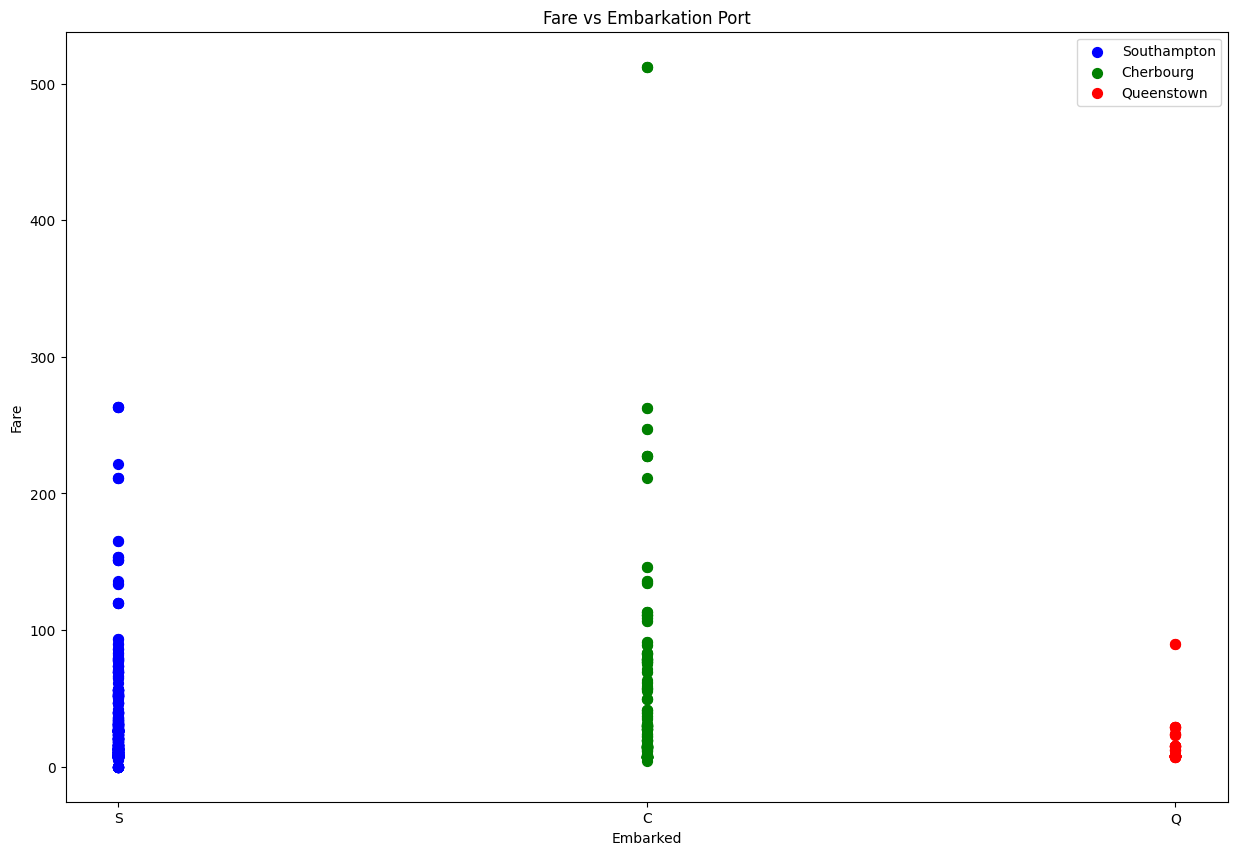

In [30]:
def plot_scatter_chart(df):
    embarked_S = df[df['Embarked'] == 'S']
    embarked_C = df[df['Embarked'] == 'C']
    embarked_Q = df[df['Embarked'] == 'Q']
    
    plt.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(embarked_S['Embarked'], embarked_S['Fare'], color='blue', label='Southampton', s=50)
    plt.scatter(embarked_C['Embarked'], embarked_C['Fare'], color='green', label='Cherbourg', s=50)
    plt.scatter(embarked_Q['Embarked'], embarked_Q['Fare'], color='red', label='Queenstown', s=50)

    plt.xlabel("Embarked")
    plt.ylabel("Fare")
    plt.title("Fare vs Embarkation Port")
    
    plt.legend()
    
    plt.show()

plot_scatter_chart(df2)


In [31]:
survival_count = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
total_count = df.groupby('Embarked').size()
survival_count['Total'] = total_count

print(survival_count)

Survived    0    1  Total
Embarked                 
C          75   93    168
Q          47   30     77
S         427  217    644


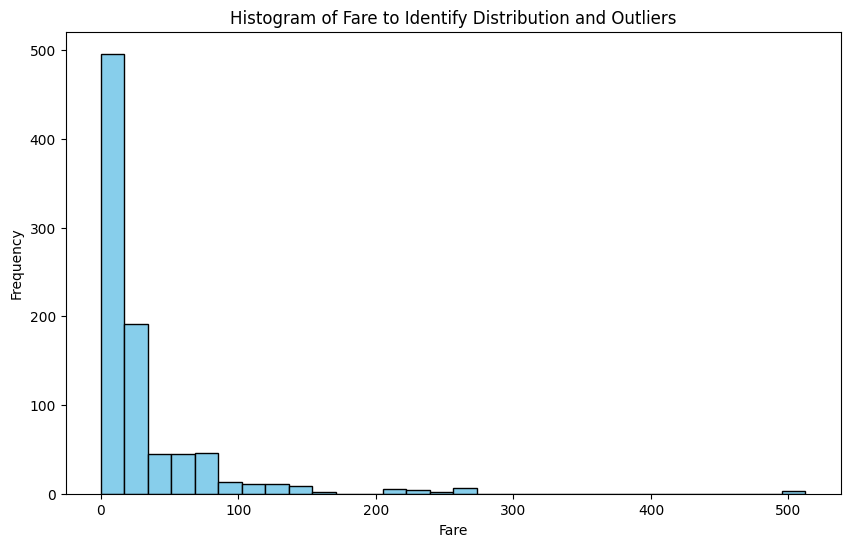

In [32]:
def plot_fare_histogram(df):
    plt.figure(figsize=(10, 6))
    
    plt.hist(df['Fare'], bins=30, color='skyblue', edgecolor='black')
    
    plt.title("Histogram of Fare to Identify Distribution and Outliers")
    plt.xlabel("Fare")
    plt.ylabel("Frequency")
    plt.show()

plot_fare_histogram(df2)

In [33]:
Q1 = df2['Fare'].quantile(0.25)
Q3 = df2['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df2[(df2['Fare'] >= lower_bound) & (df2['Fare'] <= upper_bound)]
df3.shape

(775, 12)

In [34]:
df3['Fare'].describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

In [35]:
survival_count = df3.groupby(['Fare', 'Survived']).size().unstack(fill_value=0)
total_count = df3.groupby('Fare').size()
survival_count['Total'] = total_count
survival_count['Survival Rate'] = survival_count[1] / survival_count['Total']
print(survival_count.tail(20))

Survived  0  1  Total  Survival Rate
Fare                                
50.0000   1  0      1       0.000000
50.4958   1  0      1       0.000000
51.4792   0  1      1       1.000000
51.8625   1  1      2       0.500000
52.0000   4  3      7       0.428571
52.5542   0  3      3       1.000000
53.1000   2  3      5       0.600000
55.0000   0  2      2       1.000000
55.4417   0  1      1       1.000000
55.9000   1  1      2       0.500000
56.4958   2  5      7       0.714286
56.9292   0  2      2       1.000000
57.0000   0  2      2       1.000000
57.9792   0  2      2       1.000000
59.4000   0  1      1       1.000000
61.1750   1  0      1       0.000000
61.3792   1  0      1       0.000000
61.9792   1  0      1       0.000000
63.3583   0  1      1       1.000000
65.0000   0  2      2       1.000000


In [36]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            162
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          661
Embarked         0
dtype: int64

In [37]:
df4 = df3.drop(['Cabin'], axis='columns')

In [38]:
df4.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [39]:
survival_count = df4.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(fill_value=0)
print(survival_count)

Survived           0   1
Embarked Pclass         
C        1        15  18
         2         8   9
         3        41  25
Q        2         1   2
         3        45  27
S        1        40  39
         2        83  76
         3       279  67


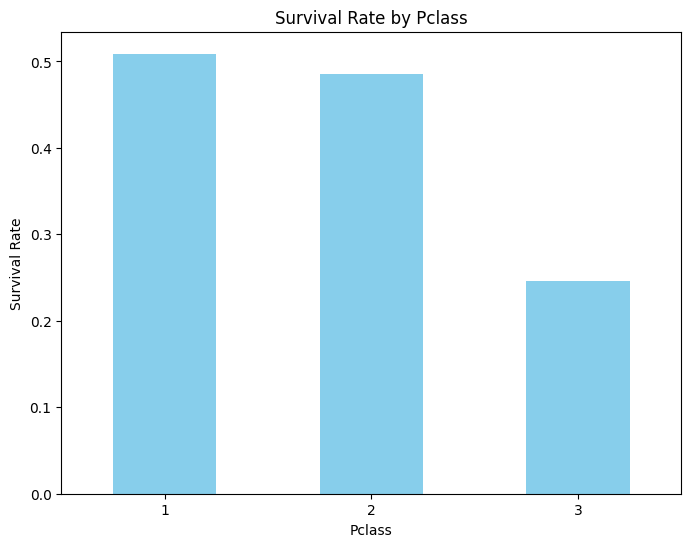

In [40]:
import matplotlib.pyplot as plt

survival_count_pclass = df4.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

survival_count_pclass['Survival Rate'] = survival_count_pclass[1] / (survival_count_pclass[0] + survival_count_pclass[1])

plt.figure(figsize=(8, 6))
survival_count_pclass['Survival Rate'].plot(kind='bar', color='skyblue')
plt.title("Survival Rate by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

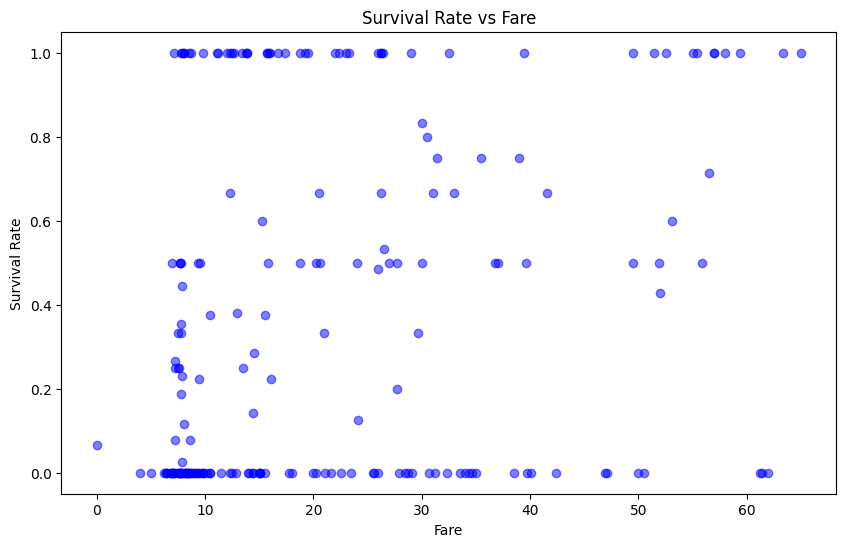

In [41]:
survival_rate_by_fare = df4.groupby('Fare')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(survival_rate_by_fare.index, survival_rate_by_fare.values, color='blue', alpha=0.5)
plt.title("Survival Rate vs Fare")
plt.xlabel("Fare")
plt.ylabel("Survival Rate")
plt.show()

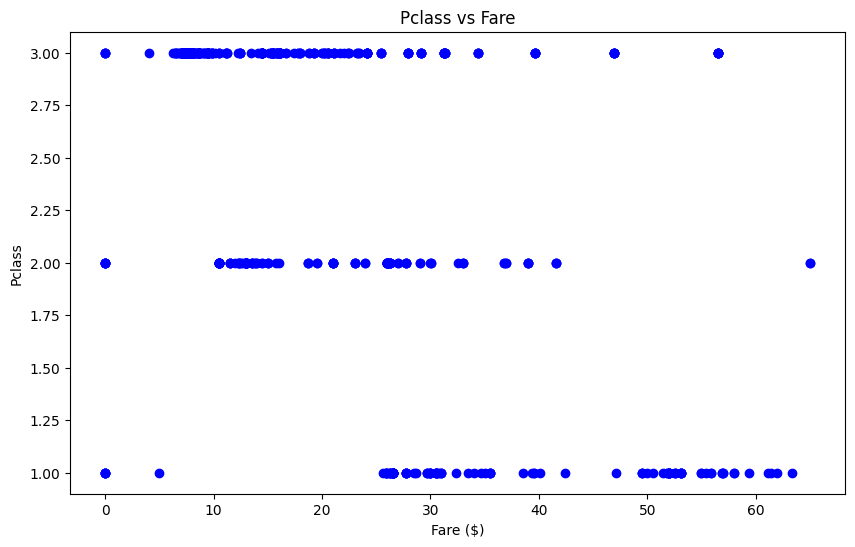

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['Fare'], df4['Pclass'], color='blue')
plt.title("Pclass vs Fare")
plt.xlabel("Fare ($)")
plt.ylabel("Pclass")
plt.show()

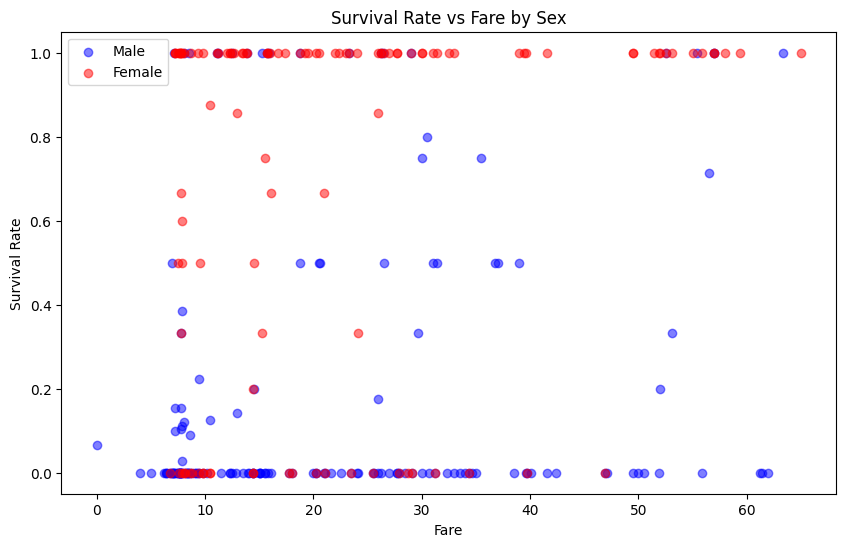

In [43]:
survival_rate_by_fare_sex = df4.groupby(['Fare', 'Sex'])['Survived'].mean().unstack()

plt.figure(figsize=(10, 6))

plt.scatter(survival_rate_by_fare_sex.index, survival_rate_by_fare_sex['male'], color='blue', alpha=0.5, label='Male')
plt.scatter(survival_rate_by_fare_sex.index, survival_rate_by_fare_sex['female'], color='red', alpha=0.5, label='Female')

plt.title("Survival Rate vs Fare by Sex")
plt.xlabel("Fare")
plt.ylabel("Survival Rate")
plt.legend()
plt.show()

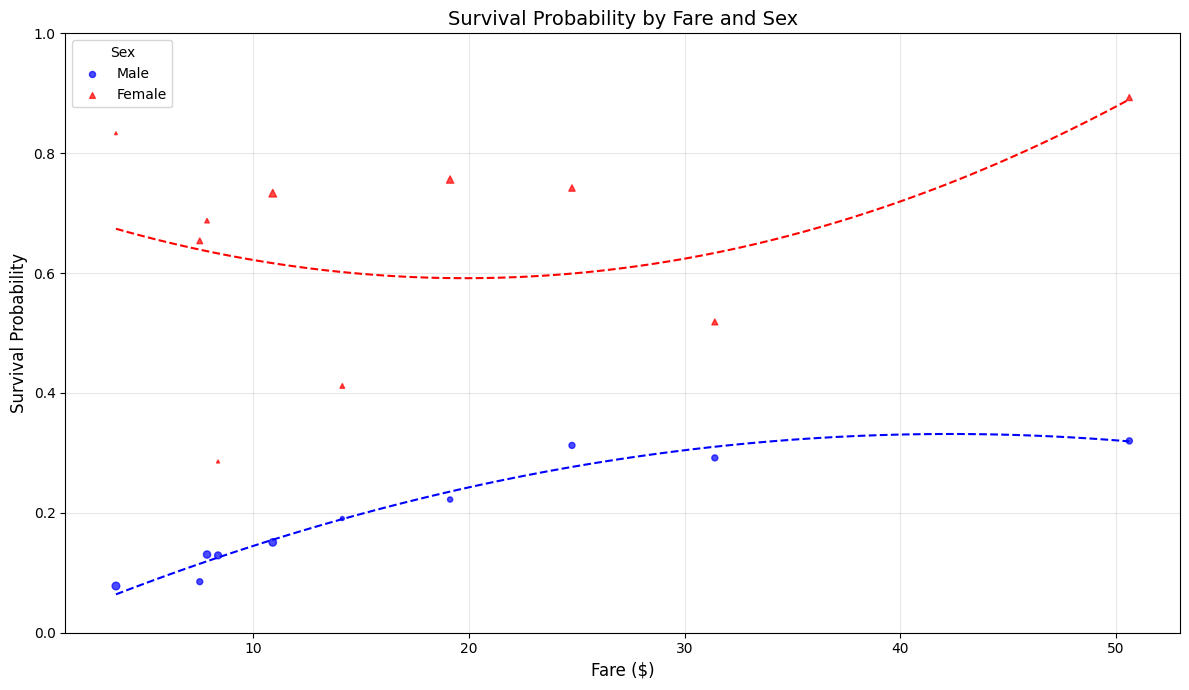

In [44]:
from scipy import stats

df4['Fare_Smooth'] = pd.qcut(df4['Fare'], 10).apply(lambda x: x.mid)

grouped = df4.groupby(['Fare_Smooth', 'Sex'], observed=False)['Survived'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(12, 7))

for sex, color, marker in zip(['male', 'female'], ['blue', 'red'], ['o', '^']):
    sex_data = grouped[grouped['Sex'] == sex]
    
    # Size points by count
    sizes = 30 * (sex_data['count'] / sex_data['count'].max())
    
    plt.scatter(sex_data['Fare_Smooth'], sex_data['mean'], 
                s=sizes, alpha=0.7, 
                color=color, marker=marker, 
                label=f"{sex.title()}")
    
    # Add trend line
    x = sex_data['Fare_Smooth']
    y = sex_data['mean']
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    x_smooth = np.linspace(x.min(), x.max(), 100)
    plt.plot(x_smooth, p(x_smooth), color=color, linestyle='--')

plt.title('Survival Probability by Fare and Sex', fontsize=14)
plt.xlabel('Fare ($)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')

plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

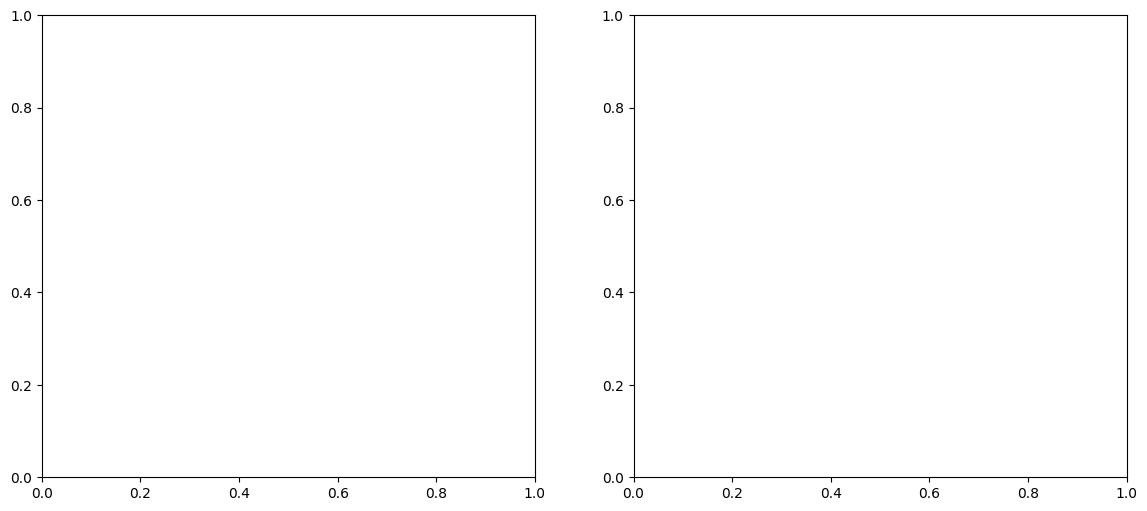

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Sex', data=df4, ax=ax1)
ax1.set_title('Passenger Count by Sex', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)

for container in ax1.containers:
    ax1.bar_label(container)
 
survival_by_sex = df4.groupby('Sex')['Survived'].mean()
bars = ax2.bar(survival_by_sex.index, survival_by_sex.values, color=['skyblue', 'salmon'])
ax2.set_title('Survival Rate by Sex', fontsize=14)
ax2.set_xlabel('Sex', fontsize=12)
ax2.set_ylabel('Survival Rate', fontsize=12)
ax2.set_ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(y='Age', data=df4, ax=ax1)
ax1.set_title('Age Distribution with Outliers', fontsize=14)
ax1.set_ylabel('Age', fontsize=12)

sns.histplot(df4['Age'].dropna(), kde=True, ax=ax2)
ax2.set_title('Age Distribution Histogram', fontsize=14)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

mean_age = df4['Age'].mean()
ax2.axvline(mean_age, color='red', linestyle='--')
ax2.text(mean_age+1, ax2.get_ylim()[1]*0.9, f'Mean: {mean_age:.2f}', color='red')

stats = df4['Age'].describe()
stats_text = f"Min: {stats['min']:.2f}\nMax: {stats['max']:.2f}\nMean: {stats['mean']:.2f}\nMedian: {stats['50%']:.2f}"
ax1.text(0.05, 0.05, stats_text, transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(df4['Age'].describe())

In [46]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_age = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]['Age']

mean_age = math.floor(filtered_age.mean())

df4['Age'] = df4['Age'].fillna(mean_age)


print(f"Mean age (excluding outliers): {mean_age}")

Mean age (excluding outliers): 29


In [47]:
df4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Fare_Smooth    0
dtype: int64

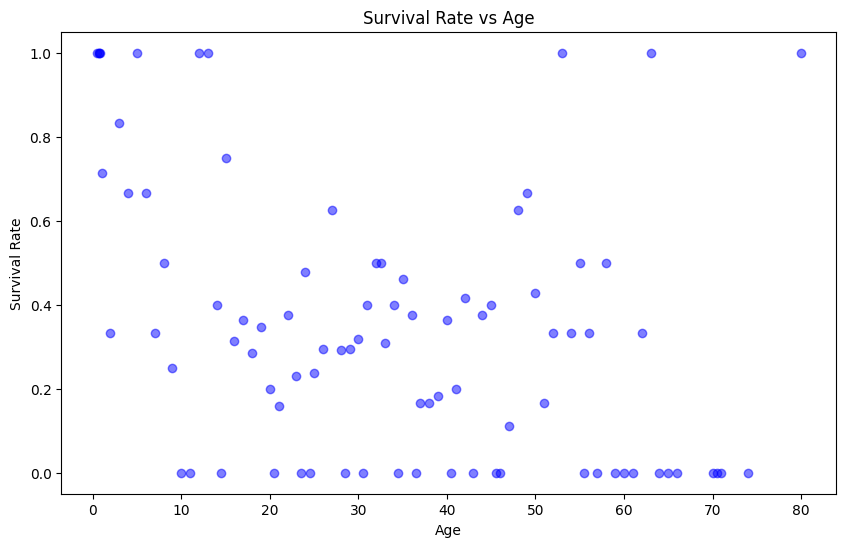

In [48]:
survival_rate_by_age = df4.groupby('Age')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(survival_rate_by_age.index, survival_rate_by_age.values, color='blue', alpha=0.5)
plt.title("Survival Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

In [49]:
df4.groupby('Parch')['Parch'].agg('count')

Parch
0    609
1     98
2     54
3      5
4      3
5      5
6      1
Name: Parch, dtype: int64

In [50]:
df4[df4['Parch']==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Smooth
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,10.8975
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C,50.6250
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,S,31.4000
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S,50.6250
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S,31.4000
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,S,7.8500
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.00,5,2,CA 2144,46.9000,S,50.6250
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,31.4000
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.00,1,2,C.A. 2315,20.5750,S,19.1230
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S,31.4000


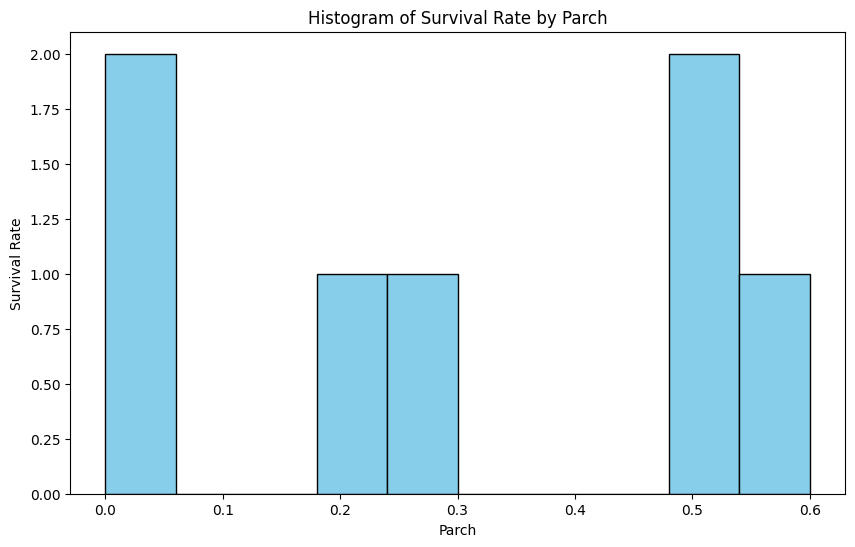

In [51]:
survival_rate_by_parch = df4.groupby('Parch')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.hist(survival_rate_by_parch, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.show()


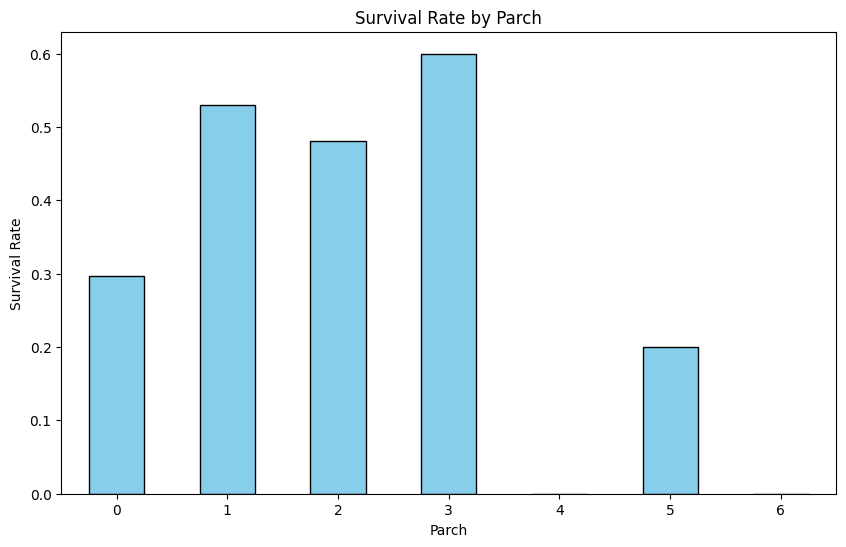

In [52]:
survival_rate_by_parch = df4.groupby('Parch')['Survived'].mean()


plt.figure(figsize=(10, 6))
survival_rate_by_parch.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

In [53]:
sex_dummies = pd.get_dummies(df4.Sex).astype(int)
df5 = pd.concat([df4,sex_dummies],axis='columns')

In [54]:
em_dummies = pd.get_dummies(df5.Embarked).astype(int)
df6 = pd.concat([df5,em_dummies],axis='columns')
df6['Age'] = df6['Age'].apply(lambda x: np.floor(x) if isinstance(x, float) else x)
df6.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Smooth,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6245,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.8500,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,50.6250,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.3600,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,8.3600,0,1,0,1,0


In [55]:
df7 = df6.drop(['PassengerId','Name','Sex','SibSp','Ticket','Fare_Smooth','Embarked'], axis='columns')
df7.head()

,Survived,Pclass,Age,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,0,7.2500,0,1,0,0,1
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1
5,0,3,29.0,0,8.4583,0,1,0,1,0


In [56]:
df8 = df7[df7['Age']!=0]
x = df8.drop(['Survived'],axis='columns')
y = df8.Survived
x.head()

,Pclass,Age,Parch,Fare,female,male,C,Q,S
0,3,22.0,0,7.2500,0,1,0,0,1
2,3,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,0,53.1000,1,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,1
5,3,29.0,0,8.4583,0,1,0,1,0


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': [0.1, 1, 10],
                'solver': ['liblinear']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10, 20],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [58]:
from sklearn.ensemble import RandomForestClassifier

def predict_with_best_random_forest(x, y):
    best_params = {
        'n_estimators': 200,
        'max_depth': 10,
        'min_samples_split': 2
    }
    
    # Create and train the Random Forest model with the best parameters
    rf_model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split']
    )
    
    rf_model.fit(x, y)
    
    predictions = rf_model.predict(x)
    
    return predictions


In [59]:
rf = predict_with_best_random_forest

In [60]:
rf(x,y)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [61]:
td = pd.read_csv('test.csv')

In [62]:
td.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [63]:
td.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
Q1 = td['Age'].quantile(0.25)
Q3 = td['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_age = td[(td['Age'] >= lower_bound) & (td['Age'] <= upper_bound)]['Age']

mean_age = math.floor(filtered_age.mean())

td['Age'] = td['Age'].fillna(mean_age)

print(f"Mean age (excluding outliers and floored): {mean_age}")

Mean age (excluding outliers and floored): 30


In [65]:
td.head(30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [66]:
sex_dummies = pd.get_dummies(td.Sex).astype(int)
td2 = pd.concat([td,sex_dummies],axis='columns')
em_dummies = pd.get_dummies(td2.Embarked).astype(int)
td3 = pd.concat([td2,em_dummies],axis='columns')
td3['Age'] = td3['Age'].apply(lambda x: np.floor(x) if isinstance(x, float) else x)
td4 =td3.drop(['PassengerId','Name','Sex','SibSp','Ticket','Embarked'], axis='columns')
td4.head()

,Pclass,Age,Parch,Fare,Cabin,female,male,C,Q,S
0,3,34.0,0,7.8292,NaN,0,1,0,1,0
1,3,47.0,0,7.0000,NaN,1,0,0,0,1
2,2,62.0,0,9.6875,NaN,0,1,0,1,0
3,3,27.0,0,8.6625,NaN,0,1,0,0,1
4,3,22.0,1,12.2875,NaN,1,0,0,0,1


In [67]:
import pandas as pd

x2 = td4[['Pclass', 'Age', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]

ydf = pd.read_csv('gender_submission.csv') 

y2 = ydf[['Survived']]

print(x2.head())
print(y2.head())


   Pclass   Age  Parch     Fare  female  male  C  Q  S
0       3  34.0      0   7.8292       0     1  0  1  0
1       3  47.0      0   7.0000       1     0  0  0  1
2       2  62.0      0   9.6875       0     1  0  1  0
3       3  27.0      0   8.6625       0     1  0  0  1
4       3  22.0      1  12.2875       1     0  0  0  1
   Survived
0         0
1         1
2         0
3         0
4         1


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = rf_model.score(X_test, y_test)

print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 82.47%


In [69]:
rf_model.predict(x2)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
rf_model.score(x2,y2)

0.8229665071770335

In [72]:
predictions = rf_model.predict(x2)
predictions_df = pd.DataFrame(predictions, columns=['Survived'])
predictions_df['PassengerId'] = td['PassengerId']
predictions_df = predictions_df[['PassengerId', 'Survived']]
predictions_df.to_csv('predictions_with_passenger_id.csv', index=False)